In [2]:
#!pip install -r "requirements.txt"

In [548]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [549]:
pd.options.display.max_columns = None

In [787]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
pokemon = pd.read_csv("./pokemon.csv", index_col="#")

# Analisi

In [773]:
train

,Winner,First_pokemon,Second_pokemon
0,302,302,764
1,740,346,740
2,373,373,559
3,514,304,514
4,344,10,344
...,...,...,...
35995,27,455,27
35996,28,28,636
35997,361,361,298
35998,205,205,30


In [774]:
pokemon

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True


## Valori mancanti / nulli

In [775]:
pokemon.isnull().sum()

Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [776]:
train.isnull().sum()

Winner            0
First_pokemon     0
Second_pokemon    0
dtype: int64

In [786]:
print(f"Missing (type 2) { len(pokemon[pokemon['Type 2'].isnull()]) / len(pokemon.index) * 100 }% ")

Missing (type 2) 48.25% 


### Considerazioni
- E' presente un Pokemon con un nome mancante
- 386 Pokemon non hanno un tipo 2 (48,25% del dataset di training)

In [788]:
def convertTarget(_df):
    df = _df.copy()
    df['Winner'] = (df['Winner'] == df['First_pokemon']).map(lambda el: 1 if el else 2)
    return df


In [789]:
train = convertTarget(train)
test = convertTarget(test)

In [731]:
#null_values_count = pokemon['Type 2'].isna().sum()

#print(null_values_count / len(pokemon.index)* 100)
#len(pokemon.index)
#pokemon['Type 2'].isna().sum()
#pokemon.loc[pokemon['Name'] == 'Charmander']

In [790]:
columns_to_drop = ['Name', 'Type 2', 'Generation', 'Defense']
for col in columns_to_drop:
    try:
        pokemon = pokemon.drop(columns=col)
    except:
        continue

In [791]:
# encoder = LabelEncoder()
# categorical_cols = ['Type 2']
# for col in categorical_cols:
#     try:
#         pokemon[col] = encoder.fit_transform(pokemon[col])
#     except:
#         continue

In [792]:
pokemon.Legendary = pokemon.Legendary.map(lambda el: 1 if el else 0)

In [793]:
pokemon.head()

,Type 1,HP,Attack,Sp. Atk,Sp. Def,Speed,Legendary
#,,,,,,,
1,Grass,45,49,65,65,45,0
2,Grass,60,62,80,80,60,0
3,Grass,80,82,100,100,80,0
4,Grass,80,100,122,120,80,0
5,Fire,39,52,60,50,65,0


In [794]:
def mergePokemonsData(df):
    full_data = pd.merge(df, pokemon.add_prefix("First_pokemon_"), how="left", left_on=['First_pokemon'], right_index=True)
    full_data = pd.merge(full_data, pokemon.add_prefix("Second_pokemon_"), how="left", left_on=['Second_pokemon'],  right_index=True)
    full_data.drop(columns=['First_pokemon', 'Second_pokemon'], inplace=True)
    return full_data

In [798]:
full_train_data = mergePokemonsData(train)
full_test_data = mergePokemonsData(test)
full_train_data

,Winner,First_pokemon_Type 1,First_pokemon_HP,First_pokemon_Attack,First_pokemon_Sp. Atk,First_pokemon_Sp. Def,First_pokemon_Speed,First_pokemon_Legendary,Second_pokemon_Type 1,Second_pokemon_HP,Second_pokemon_Attack,Second_pokemon_Sp. Atk,Second_pokemon_Sp. Def,Second_pokemon_Speed,Second_pokemon_Legendary
0,1,Water,40,30,55,30,85,0,Water,71,73,120,89,59,0
1,2,Poison,70,43,43,53,40,0,Fairy,78,65,112,154,75,0
2,1,Water,110,78,76,71,60,0,Fire,90,93,70,55,55,0
3,2,Psychic,28,25,45,35,40,0,Electric,70,70,130,90,60,0
4,2,Water,44,48,50,64,43,0,Bug,65,47,73,75,85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,2,Rock,97,165,65,50,58,0,Normal,40,60,31,31,70,0
35996,1,Normal,65,90,61,61,100,0,Psychic,45,30,55,65,45,0
35997,1,Ground,50,70,50,50,70,0,Grass,70,70,60,40,60,0
35998,1,Grass,75,55,55,95,110,0,Poison,60,85,65,79,80,0


In [800]:
encoder = LabelEncoder()
categorical_cols = ['First_pokemon_Type 1', 'Second_pokemon_Type 1']
for col in categorical_cols:
    try:
        full_train_data[col] = encoder.fit_transform(full_train_data[col])
        full_test_data[col] = encoder.fit_transform(full_test_data[col])
    except:
        continue

In [802]:
full_test_data

,Winner,First_pokemon_Type 1,First_pokemon_HP,First_pokemon_Attack,First_pokemon_Sp. Atk,First_pokemon_Sp. Def,First_pokemon_Speed,First_pokemon_Legendary,Second_pokemon_Type 1,Second_pokemon_HP,Second_pokemon_Attack,Second_pokemon_Sp. Atk,Second_pokemon_Sp. Def,Second_pokemon_Speed,Second_pokemon_Legendary
0,2,10,109,66,81,99,32,0,6,91,90,130,106,77,1
1,2,0,30,30,30,42,70,0,0,80,70,100,60,145,0
2,1,2,108,170,120,95,92,0,17,85,105,79,83,78,0
3,2,0,50,35,25,25,15,0,12,105,125,60,100,100,0
4,2,9,60,40,40,60,35,0,13,75,80,65,75,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2,14,190,33,33,58,33,0,12,85,76,45,55,90,0
3996,1,14,62,48,63,60,68,0,9,60,65,85,75,40,0
3997,2,17,95,85,65,65,35,0,17,64,66,81,76,50,0
3998,2,12,255,10,75,135,55,0,6,76,104,104,71,108,0


In [738]:
#sns.countplot(x=full_data['First_pokemon_Type 1'], hue=full_data['Winner'])

In [739]:
#sns.countplot(x=full_data['Second_pokemon_Type 1'], hue=full_data['Winner'])

In [740]:
#sns.countplot(x=full_data['First_pokemon_Legendary'], hue=full_data['Winner'])

In [741]:
#sns.countplot(x=full_data['Second_pokemon_Legendary'], hue=full_data['Winner'])

<AxesSubplot:>

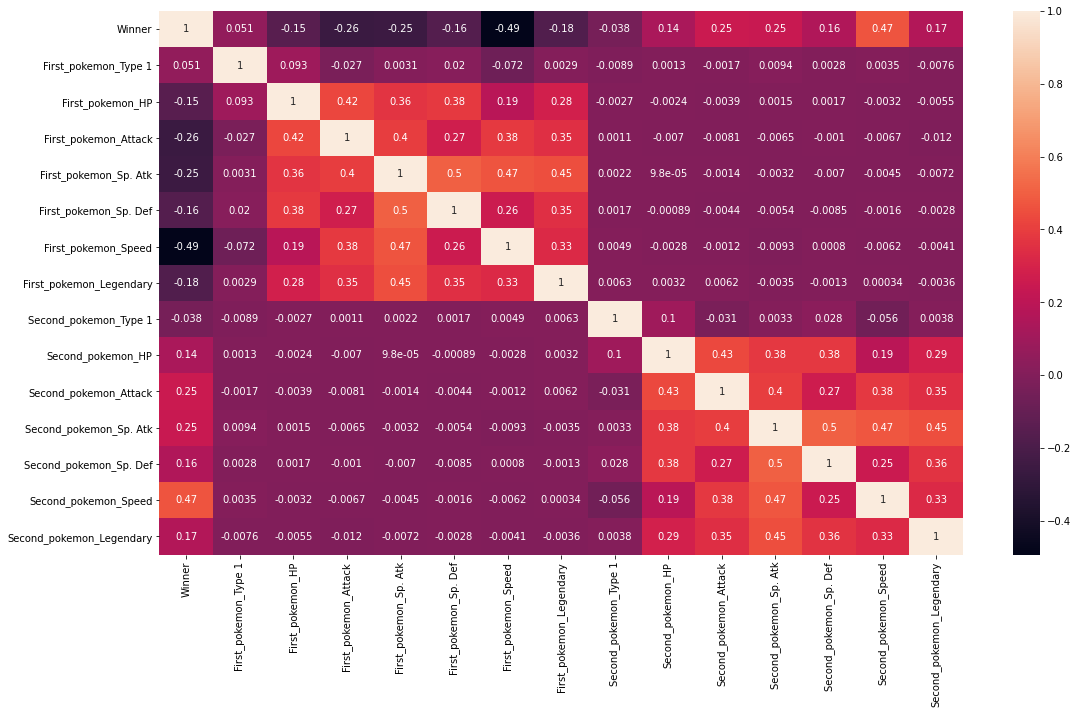

In [803]:
corr = full_train_data.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

In [806]:
X_train = full_train_data.drop(columns=['Winner'])
y_train = full_train_data.Winner

X_test = full_test_data.drop(columns='Winner')
y_test = full_test_data.Winner
X_train

,First_pokemon_Type 1,First_pokemon_HP,First_pokemon_Attack,First_pokemon_Sp. Atk,First_pokemon_Sp. Def,First_pokemon_Speed,First_pokemon_Legendary,Second_pokemon_Type 1,Second_pokemon_HP,Second_pokemon_Attack,Second_pokemon_Sp. Atk,Second_pokemon_Sp. Def,Second_pokemon_Speed,Second_pokemon_Legendary
0,17,40,30,55,30,85,0,17,71,73,120,89,59,0
1,13,70,43,43,53,40,0,4,78,65,112,154,75,0
2,17,110,78,76,71,60,0,6,90,93,70,55,55,0
3,14,28,25,45,35,40,0,3,70,70,130,90,60,0
4,17,44,48,50,64,43,0,0,65,47,73,75,85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,15,97,165,65,50,58,0,12,40,60,31,31,70,0
35996,12,65,90,61,61,100,0,14,45,30,55,65,45,0
35997,10,50,70,50,50,70,0,9,70,70,60,40,60,0
35998,9,75,55,55,95,110,0,13,60,85,65,79,80,0


In [744]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

# Addestramento

In [807]:
model = RandomForestClassifier(random_state=20)
model.fit(X_train, y_train)

print("Trained!")

Trained!


# Accuracy

In [808]:
train_score = model.score(X_train, y_train)
print(f"Train set score: {round(train_score, 2) * 100}%")

Train set score: 100.0%


In [810]:
test_score = model.score(X_test, y_test)
print(f"Test set score: {round(test_score, 2) * 100}%")

Test set score: 94.0%
